# Playing around with least squares math

In [16]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_blobs(200, centers=2)

<AxesSubplot: >

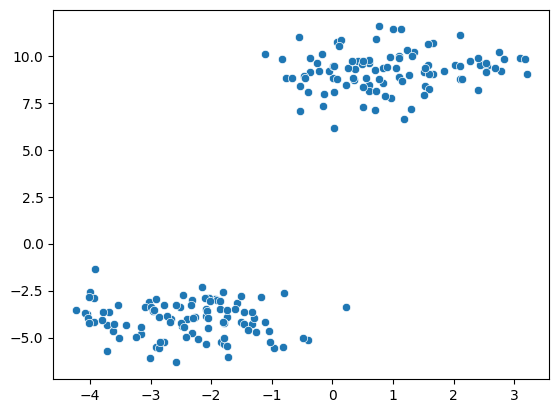

In [17]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

### make a linear model with least squares manually, plot the line
$\hat{Y} = \hat{\beta}_0 + \sum_{j=1}^p X_j \hat{\beta}_j$

how is the distribution of $(y_i - x_i^\top \beta)^2$ distributed?

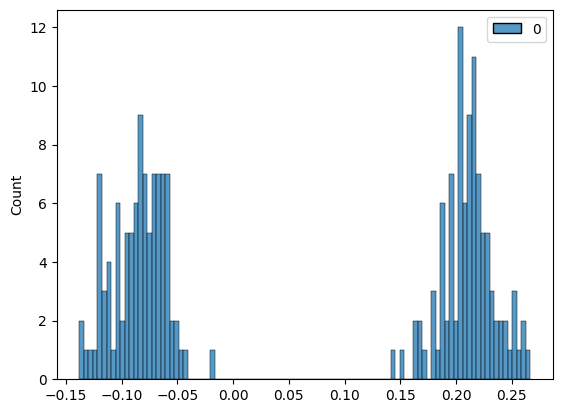

<AxesSubplot: ylabel='Count'>

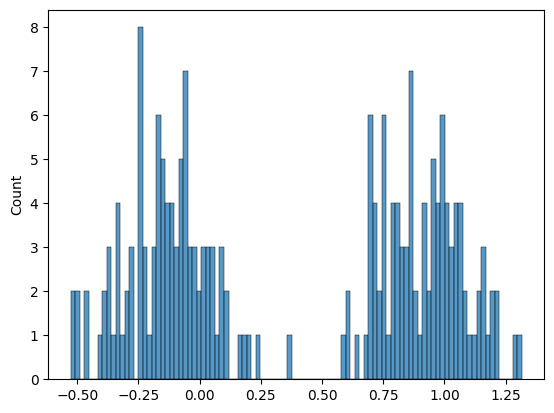

In [111]:
B = np.random.randn(1, 2).T; B

sns.histplot((X @ B), bins=100)
plt.show()

B = np.linalg.inv(X.T@X) @ X.T @ y
sns.histplot(X @ B, bins=100)

In [121]:
B = np.atleast_2d(B); B



array([[-0.13131733],
       [ 0.11289544]])

In [123]:
yhat = X@B

from sklearn import metrics

dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_

In [129]:
y

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0])

In [131]:
yhat_bin = np.where(yhat > .5, 1, 0)

In [132]:
metrics.confusion_matrix(y, yhat_bin)

array([[100,   0],
       [  0, 100]])

In [19]:
X.shape

(200, 2)

In [20]:
X.T @ X

array([[  861.70594712,  1833.64925873],
       [ 1833.64925873, 10285.87986383]])

In [18]:
X @ X.T

array([[ 95.67653497, -27.28098215, 103.24535022, ..., -63.62958013,
        -42.43429199, -52.1202944 ],
       [-27.28098215,   9.97123255, -29.44938856, ...,  21.25103986,
         12.06978631,  15.48123177],
       [103.24535022, -29.44938856, 111.41297009, ..., -68.67774599,
        -45.79106041, -56.24634445],
       ...,
       [-63.62958013,  21.25103986, -68.67774599, ...,  46.7223459 ,
         28.178599  ,  35.54111279],
       [-42.43429199,  12.06978631, -45.79106041, ...,  28.178599  ,
         18.82078991,  23.10787109],
       [-52.1202944 ,  15.48123177, -56.24634445, ...,  35.54111279,
         23.10787109,  28.56800898]])

### KNN

$\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k (x)} y_i$

In [134]:
X.shape  # (200, 2)

(200, 2)

In [143]:
y = np.atleast_2d(y).T  # (200, 1)

In [145]:
y.shape

(200, 1)

In [164]:
G = X@X.T

In [166]:
sqnorms = np.atleast_2d(np.diag(G))

In [167]:
(sqnorms + sqnorms.T).shape

(200, 200)

In [168]:
D = (sqnorms + sqnorms.T) - 2*G

In [171]:
D

array([[  0.        , 160.20973181,   0.59880462, ..., 269.65804114,
        199.36590886, 228.48513275],
       [160.20973181,   0.        , 180.28297976, ...,  14.19149873,
          4.65244983,   7.57677799],
       [  0.59880462, 180.28297976,   0.        , ..., 295.49080797,
        221.81588083, 252.47366797],
       ...,
       [269.65804114,  14.19149873, 295.49080797, ...,   0.        ,
          9.18593781,   4.2081293 ],
       [199.36590886,   4.65244983, 221.81588083, ...,   9.18593781,
          0.        ,   1.17305672],
       [228.48513275,   7.57677799, 252.47366797, ...,   4.2081293 ,
          1.17305672,   0.        ]])

In [172]:
from sklearn.metrics.pairwise import euclidean_distances

In [175]:
dist = euclidean_distances(X)  # equal to what I just calculated

In [178]:
dist

array([[ 0.        , 12.6573983 ,  0.77382467, ..., 16.42126795,
        14.11969932, 15.11572468],
       [12.6573983 ,  0.        , 13.42694976, ...,  3.76716057,
         2.15695383,  2.75259477],
       [ 0.77382467, 13.42694976,  0.        , ..., 17.18984607,
        14.89348451, 15.88942   ],
       ...,
       [16.42126795,  3.76716057, 17.18984607, ...,  0.        ,
         3.03083121,  2.05137254],
       [14.11969932,  2.15695383, 14.89348451, ...,  3.03083121,
         0.        ,  1.08307743],
       [15.11572468,  2.75259477, 15.88942   , ...,  2.05137254,
         1.08307743,  0.        ]])

In [179]:
x_i = 0

In [182]:
dist[:, x_i].shape

(200,)

In [197]:
xi_dist = dist[:, x_i]
top = xi_dist[np.argsort(-xi_dist)]

k = 10
topk = top[:k]

print(topk)  # euclidean distance

[16.58236222 16.48115076 16.42126795 16.06347743 15.92314511 15.92293799
 15.66857266 15.64047147 15.61431094 15.53483726]
